In [2]:
from neo4j import GraphDatabase

def get_neo4j_driver() -> GraphDatabase.driver:
    """Establishes and returns a Neo4j session for AuraDB."""
    neo4j_uri = 'neo4j+s://9d1381c2.databases.neo4j.io:7687'
    neo4j_user = 'Shirley'
    neo4j_password = 'Sxl19950312'
    return GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))

# Call the function to get the driver
driver = get_neo4j_driver()

# Open a session
with driver.session() as session:
    # Verify connectivity within the session
    session.run("RETURN 1")

print("Connectivity verified successfully.")


from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd


# Define a Cypher query to retrieve the required data
query = """
MATCH (n)
RETURN n
"""

# Execute the query and process the results
with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]

# Converting Neo4j Data to Pandas DataFrame Format
df = pd.DataFrame(neo4j_data)

print(df)

Connectivity verified successfully.
                                                       n
0                                 {'name': 'Woolworths'}
1                                  {'name': 'Australia'}
2      {'address': 'Sydney Address Here', 'name': 'Sy...
3                                {'name': 'Coca - Cola'}
4                     {'name': 'CARBONATED SOFT DRINKS'}
...                                                  ...
19253          {'id': '73', 'productName': 'Röd Kaviar'}
19254       {'id': '74', 'productName': 'Longlife Tofu'}
19255  {'id': '75', 'productName': 'Rhönbräu Klosterb...
19256        {'id': '76', 'productName': 'Lakkalikööri'}
19257  {'id': '77', 'productName': 'Original Frankfur...

[19258 rows x 1 columns]


In [8]:
def find_recipes_with_allergen(allergen):
    with driver.session() as session:
        query = """
        MATCH (r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
        WHERE i.name CONTAINS $allergen
        RETURN r.Ingredients_orig as recipe
        """
        results = session.run(query, allergen=allergen)
        return [record["recipe"] for record in results]

# Look for recipes containing "peanuts".
peanut_recipes = find_recipes_with_allergen("peanut")
print(f"Has peanut:")
for recipe in peanut_recipes:
    print(recipe)

Has peanut:


In [9]:
from neo4j import GraphDatabase

def find_common_recipe_ingredient_combos(limit=10):
    with driver.session() as session:
        query = """
        MATCH (r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
        WITH r, collect(i) as ingredients
        UNWIND ingredients as combo
        WITH combo, count(*) as freq
        RETURN combo, freq
        ORDER BY freq DESC
        LIMIT $limit
        """
        results = session.run(query, limit=limit)
        return [(combo, freq) for combo, freq in results]

# top 10 combos
top_combos = find_common_recipe_ingredient_combos()
print("Top Recipe-Ingredient Combinations:")
for combo, freq in top_combos:
    print(f"{combo} : {freq}")

Top Recipe-Ingredient Combinations:
<Node element_id='4:147ff9b1-49f5-4fcd-90d6-d7ba62c5ec97:1478' labels=frozenset({'Ingredient'}) properties={'name': 'Sugar', 'id': 'b9f7c4c1f41831df11fb94b9a503d8f2e263374877e7bcee97c11a5351d2d8e7'}> : 59
<Node element_id='4:147ff9b1-49f5-4fcd-90d6-d7ba62c5ec97:1489' labels=frozenset({'Ingredient'}) properties={'name': 'Salt', 'id': '986138830adb98efed3e00e2003c643b910ca552187d280e5990ffc0b47c8561'}> : 49
<Node element_id='4:147ff9b1-49f5-4fcd-90d6-d7ba62c5ec97:1522' labels=frozenset({'Ingredient'}) properties={'name': 'Vegetable Oil', 'id': '393717e419a3f2c2fbed7c6a92e6f89e17ff8dcd935c5402267d82e51b3c1b5e'}> : 29
<Node element_id='4:147ff9b1-49f5-4fcd-90d6-d7ba62c5ec97:1487' labels=frozenset({'Ingredient'}) properties={'name': 'Wheat Flour', 'id': '0db23572d08ee9f6a071d1258e99b040b8e4182e51f040108bbab83b60cc0bb5'}> : 27
<Node element_id='4:147ff9b1-49f5-4fcd-90d6-d7ba62c5ec97:1594' labels=frozenset({'Ingredient'}) properties={'name': 'Soy Lecithin',

In [14]:
def find_alternative_ingredients(ingredient):
    with driver.session() as session:
        query = """
        MATCH (i:Ingredient)-[:USES_INGREDIENT]->(r:Recipe)<-[:REQUIRES]-(alt:Ingredient)
        WHERE i.name = $ingredient_name
        RETURN alt.name as alternative, count(*) as common_recipes
        ORDER BY common_recipes DESC
        """
        results = session.run(query, ingredient_name=ingredient)
        return [(alt["alternative"], alt["common_recipes"]) for alt in results]

alternatives = find_alternative_ingredients("Sugar")
print("Potential alternatives for Sugar:")
for alt, common_recipes in alternatives:
    print(f"{alt} (used in {common_recipes} recipes)")

Potential alternatives for Sugar:


In [41]:
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupMeasure AS Size
"""

def get_product_sizes():
    products = []
    sizes = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            size = record["Size"]
            if size is not None:
                products.append(product)
                sizes.append(size)
    return products, sizes


products, sizes = get_product_sizes()


fig = go.Figure(data=go.Bar(x=products, y=sizes))


fig.update_layout(
    title="Product Sizes",
    xaxis_title="Product",
    yaxis_title="Size"
)

fig.show()



In [39]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.price AS Price
"""

def get_product_prices():
    products = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            price = record["Price"]
            if price is not None:
                products.append(product)
                prices.append(price)
    return products, prices

# get the name and price
products, prices = get_product_prices()

# create Plotly scatter
fig = go.Figure(data=go.Scatter(x=products, y=prices, mode='markers'))

# set the layout
fig.update_layout(
    title="Product Prices",
    xaxis_title="Product",
    yaxis_title="Price"
)

# show
fig.show()


In [46]:
from neo4j import GraphDatabase

query = """
MATCH (p:Product)-[:HAS_RECIPE]->(c:Recipe)
RETURN p.name AS Product, c.ingredients_orig AS Recipe
"""

def find_products_with_same_recipe():
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            recipe = record["Recipe"]
            product = record["Product"]
            print(f"Product: {product}")
            print("Recipe:")
            print(recipe)
            print("")

find_products_with_same_recipe()



Product: Coca - Cola Classic  Soft Drink Multipack Cans
Recipe:
Carbonated Water, Sugar, Colour (150d), Food Acid (338), Flavour, Caffeine.

Product: Coca - Cola Classic  Soft Drink Multipack Cans
Recipe:
Carbonated Water, Sugar, Colour (150d), Food Acid (338), Flavour, Caffeine.

Product: Coca - Cola Classic  Soft Drink Multipack Cans
Recipe:
Carbonated Water, Sugar, Colour (150d), Food Acid (338), Flavour, Caffeine.

Product: Coca - Cola Classic  Soft Drink Mini Cans
Recipe:
Carbonated Water, Sugar, Colour (150d), Food Acid (338), Flavour, Caffeine.

Product: Coca - Cola Vanilla  Soft Drink Multipack Cans
Recipe:
Carbonated Water, Sugar, Colour (150d), Food Acid (338), Flavour, Caffeine.

Product: Coca - Cola Zero Sugar Soft Drink Multipack Cans
Recipe:
Carbonated Water, Colour (150d), Food Acids (338, 331), Sweeteners (951, 950), Flavour, Caffeine.

Product: Coca - Cola Zero Sugar Soft Drink Multipack Cans
Recipe:
Carbonated Water, Colour (150d), Food Acids (338, 331), Sweeteners (9

In [47]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

# Define query statements: retrieve information about products and their formulations
query = """
MATCH (p:Product)-[:HAS_RECIPE]->(c:Recipe)
RETURN p.name AS Product, c.ingredients_orig AS Recipe
"""

def get_product_recipes():
    products = []
    recipes = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            recipe = record["Recipe"]
            products.append(product)
            recipes.append(recipe)
    return products, recipes


products, recipes = get_product_recipes()

#Creating Text Charts
fig = go.Figure(data=[go.Table(
    header=dict(values=['Product', 'Recipe'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[products, recipes],
               fill_color='lavender',
               align='left'))
])


fig.update_layout(
    title="Products and Their Recipes"
)


fig.show()


In [3]:
# Define query statements: retrieve information about products and their formulations
query = """
MATCH (p:Product)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, c.name AS Category
"""

def get_product_categories():
    products = []
    categories = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            category = record["Category"]
            categories.append(category)
            products.append(product)
    return products, categories


products, categories = get_product_categories()

#Creating Text Charts
fig11 = go.Figure(data=[go.Table(
    header=dict(values=['Product', 'Category'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[products, categories],
               fill_color='lavender',
               align='left'))
])


fig11.update_layout(
    title="Products and Their Categories"
)


fig11.show()

In [6]:
import re
from neo4j import GraphDatabase



# 定义查询语句
query = """
MATCH (p:Product)-[:HAS_RECIPE]->(c:Recipe)
RETURN c.ingredients_orig AS Recipe
"""

def clean_ingredients(ingred_str):
    # 去除开头和结尾的空格
    ingred_str = ingred_str.strip()

    # 使用正则表达式匹配每个成分项
    pattern = r'([^:]+):\s*(.+?)(\.|\,\s+\w+|\,?\s+Contains|\,?\s+May)'
    matches = re.findall(pattern, ingred_str)

    # 处理每个匹配项
    cleaned_ingredients = []
    for match in matches:
        ingredient_part = match[1].strip()
        ingredients = re.split(r'\s*\,\s*', ingredient_part)
        cleaned_ingredients.extend(ingredients)

    # 去除重复项并格式化输出
    unique_ingredients = list(set(cleaned_ingredients))
    output = ', '.join(unique_ingredients)

    return output

def clean_recipes():
    with driver.session() as session:
        result = session.run(query)
        cleaned_recipes = []
        for record in result:
            recipe = record["Recipe"]
            cleaned_recipe = clean_ingredients(recipe)
            cleaned_recipes.append(cleaned_recipe)
    return cleaned_recipes

# 获取并清理所有 recipe
cleaned_recipes = clean_recipes()

# 打印结果
for recipe in cleaned_recipes:
    print(recipe)



C:\Users\apple\AppData\Local\Temp\ipykernel_8352\851041821.py:34: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.













Wheat Flour (62%), Onion, Chilli, Sugar, Salt, Refined Palm Oil (Contains Antioxidant 319)
Noodle Cake: Wheat  Flour, Iodised Salt
Noodle Cake : Australian  Whea T Flour (70%), Salt
Salt, Wheat Flour (Gluten)
Dehydrated Vegetables, Salt, Wheat Flour (Gluten)
Dehydrated Vegetables, Wheat Flour, Salt
Wheat Flour (62%), Onion, Chilli, Sugar, Salt, Refined Palm Oil (Contains Antioxidant 319)
Australian  Wheat  Flour (70%), Mineral Salt (Potassium Chloride)
Salt, Wheat Flour (Gluten)









Sugar












Wheat Flour





Mica





































Soy































In [17]:
import re
import plotly.graph_objects as go
from neo4j import GraphDatabase

# Define query statements: retrieve information about products and their formulations
query = """
MATCH (p:Product)-[:HAS_RECIPE]->(c:Recipe)
RETURN p.name AS Product, c.ingredients_orig AS Recipe
"""

def clean_recipe(recipe_str):
    # Remove HTML tags
    cleaned = re.sub(r'<[^>]+>', '', recipe_str)
    
    # Remove extra whitespace
    cleaned = ' '.join(cleaned.split())
    cleaned = cleaned.replace('^', '')
    return cleaned

def get_product_recipes():
    products = []
    recipes = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            recipe = clean_recipe(record["Recipe"])
            products.append(product)
            recipes.append(recipe)
    return products, recipes

products, recipes = get_product_recipes()

# Creating Text Charts
fig = go.Figure(data=[go.Table(
    header=dict(values=['Product', 'Recipe'], fill_color='paleturquoise', align='left'),
    cells=dict(values=[products, recipes], fill_color='lavender', align='left'))
])

fig.update_layout(
    title="Products and Their Recipes"
)

fig.show()

C:\Users\apple\AppData\Local\Temp\ipykernel_8352\2717886153.py:23: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [16]:
import re
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:HAS_RECIPE]->(c:Recipe)
RETURN p.name AS Product, c.ingredients_orig AS Recipe
"""

def clean_ingredients(ingred_str):


    
    pattern = r'([^:]+):\s*(.*?)(\.|\,|\s+|$)'
    matches = re.findall(pattern, ingred_str)

    cleaned_ingredients = []
    if matches:
        for match in matches:
            ingredient_part = match[1].strip()
            ingredients = re.split(r'\s*\,\s*', ingredient_part)
            cleaned_ingredients.extend([ingr.strip() for ingr in ingredients])
    else:
      
        cleaned_ingredients.append(ingred_str.strip())


    unique_ingredients = list(set(cleaned_ingredients))
    output = ', '.join(unique_ingredients)

    return output

def get_product_recipes():
    products = []
    recipes = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            recipe_orig = record["Recipe"]
            cleaned_ingredients = clean_ingredients(recipe_orig)
            products.append(product)
            recipes.append(cleaned_ingredients)
    return products, recipes

products, recipes = get_product_recipes()


fig = go.Figure(data=[go.Table(
    header=dict(values=['Product', 'Recipe'], fill_color='paleturquoise', align='left'),
    cells=dict(values=[products, recipes], fill_color='lavender', align='left'))
])

fig.update_layout(
    title="Products and Their Recipes"
)

fig.show()

C:\Users\apple\AppData\Local\Temp\ipykernel_8352\2557491055.py:35: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [49]:
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:HAS_RECIPE]->(c:Recipe)
RETURN p.name AS Product, c.ingredients_orig AS Recipe
"""

def get_product_recipes():
    products = []
    recipes = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            recipe = record["Recipe"]
            products.append(product)
            recipes.append(recipe)
    return products, recipes


products, recipes = get_product_recipes()


fig = go.Figure(data=[
    go.Bar(name='Recipe', x=products, y=[len(recipe.split(',')) for recipe in recipes])
])


fig.update_layout(
    title="Number of Ingredients in Products' Recipes",
    xaxis_title="Product",
    yaxis_title="Number of Ingredients" #The y-axis indicates the number of ingredients in the formulation of each product.
)


fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_8352\2496214645.py:6: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



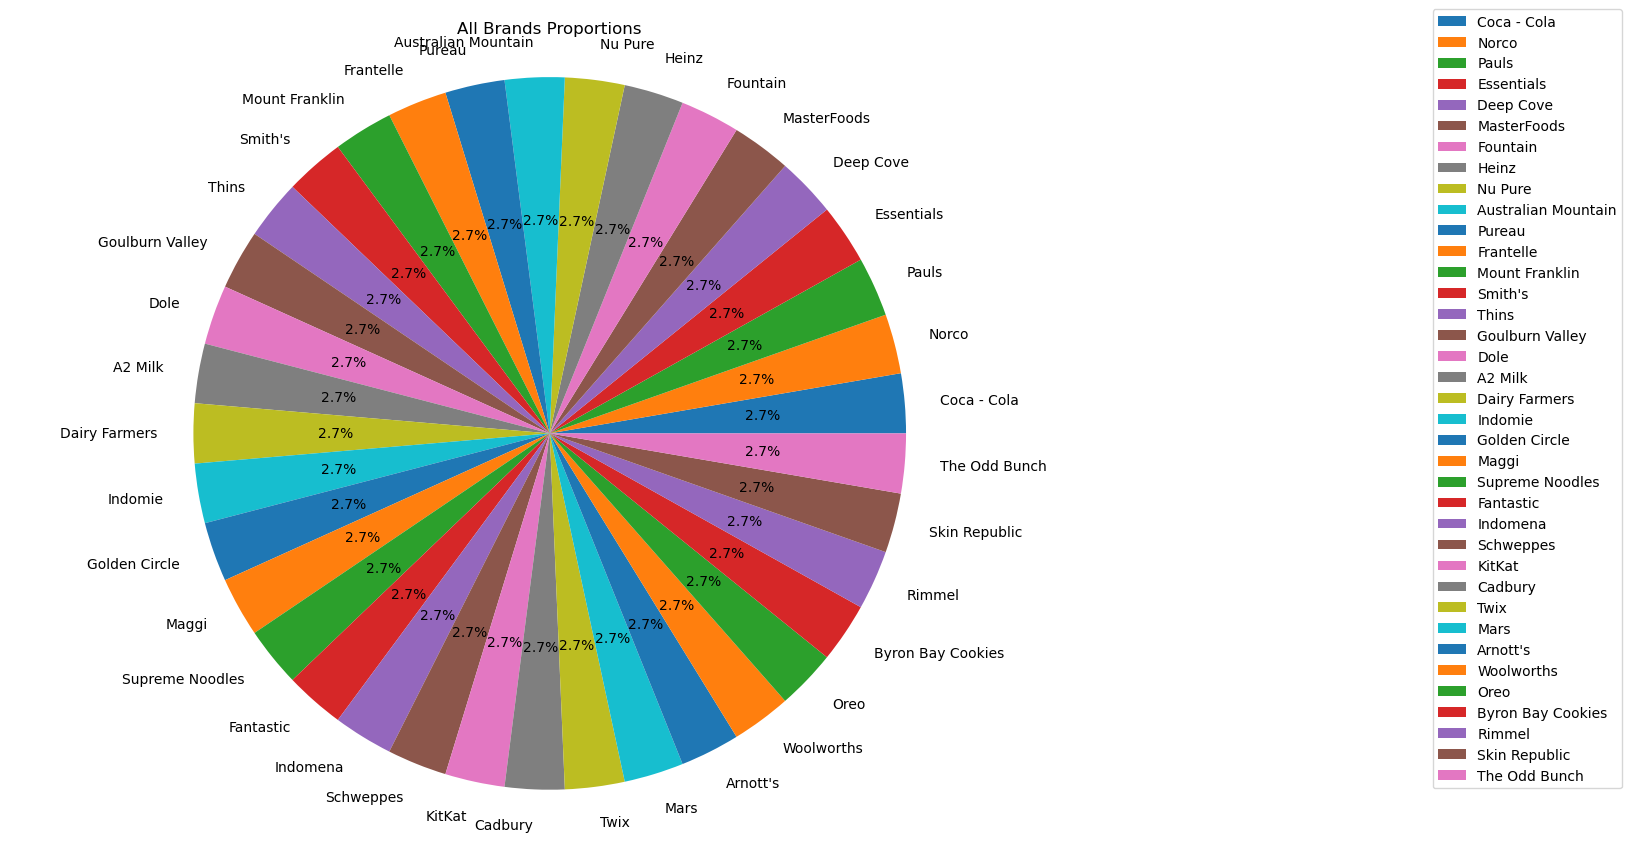

In [31]:
query = """
MATCH (p:Brand)
RETURN p.name AS brand
"""

with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]

# convert to Pandas DataFrame
df = pd.DataFrame(neo4j_data)
#print(df.head())

import matplotlib.pyplot as plt

# Get all brands and corresponding counts
brand_counts = df['brand'].value_counts()
brands = brand_counts.index.tolist()
counts = brand_counts.values

# Calculate the proportion of each brand
total_count = sum(counts)
proportions = [count/total_count for count in counts]

# Draw a pie chart
fig, ax = plt.subplots(figsize=(18, 9))
ax.pie(proportions, labels=brands, autopct='%1.1f%%')
ax.axis('equal')  # Make sure the pie chart is circular
ax.set_title('All Brands Proportions')

#Adjust label position to prevent overlap
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.tight_layout()
plt.show()


In [41]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupPrice AS CupPrice, p.price AS Price
"""

def get_product_prices():
    products = []
    cup_prices = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            cup_price = record["CupPrice"]
            price = record["Price"]
            if cup_price is not None and price is not None:
                products.append(product)
                cup_prices.append(cup_price)
                prices.append(price)
    return products, cup_prices, prices

products, cup_prices, prices = get_product_prices()

fig = go.Figure(data=[
    go.Bar(name='Cup Price', x=products, y=cup_prices),
    go.Bar(name='Price', x=products, y=prices)
])

# Change layout
fig.update_layout(
    barmode='group',
    title="Product Cup Price and Price Comparison",
    xaxis_title="Product",
    yaxis_title="Value"
)

fig.show()

# create Plotly scatter
fig1 = go.Figure(data=go.Scatter(x=prices, y=cup_prices, mode='markers'))

# Change layout
fig1.update_layout(
    title="Cup Price vs Price",
    xaxis_title="Price",
    yaxis_title="Cup Price"
)

fig1.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_8352\2015028771.py:13: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [40]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupPrice AS CupPrice, p.price AS Price
"""

def get_product_prices():
    cup_prices = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            cup_price = record["CupPrice"]
            price = record["Price"]
            if cup_price is not None and price is not None:
                cup_prices.append(cup_price)
                prices.append(price)
    return cup_prices, prices

cup_prices, prices = get_product_prices()

fig = go.Figure()

# Add boxplot traces
fig.add_trace(go.Box(y=prices, name='Price', boxmean=True))
fig.add_trace(go.Box(y=cup_prices, name='Cup Price', boxmean=True))

# Change layout
fig.update_layout(
    title="Price Comparison",
    yaxis_title="Price",
    boxmode='group'  # group boxes for comparison
)

fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_8352\3065425412.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [42]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupPrice AS CupPrice, p.price AS Price
"""

def get_product_prices():
    products = []
    cup_prices = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            cup_price = record["CupPrice"]
            price = record["Price"]
            if cup_price is not None and price is not None:
                products.append(product)
                cup_prices.append(cup_price)
                prices.append(price)
    return products, cup_prices, prices

products, cup_prices, prices = get_product_prices()

fig = go.Figure(data=go.Heatmap(
                   z=[prices, cup_prices],
                   x=products,
                   y=['Price', 'Cup Price'],
                   colorscale='Viridis'))

# Change layout
fig.update_layout(
    title="Price Comparison Heatmap",
    xaxis_title="Product",
    yaxis_title="Price Type"
)

fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_8352\1219267522.py:13: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [44]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupPrice AS CupPrice, p.price AS Price
"""

def get_product_prices():
    products = []
    cup_prices = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            cup_price = record["CupPrice"]
            price = record["Price"]
            if cup_price is not None and price is not None:
                products.append(product)
                cup_prices.append(cup_price)
                prices.append(price)
    return products, cup_prices, prices

products, cup_prices, prices = get_product_prices()

# Calculate cumulative sums for stacked area chart
cup_prices_cumsum = [sum(cup_prices[:i+1]) for i in range(len(cup_prices))]
prices_cumsum = [sum(prices[:i+1]) for i in range(len(prices))]

fig = go.Figure()

# Add traces for stacked area chart
fig.add_trace(go.Scatter(x=products, y=prices_cumsum, mode='lines', name='Price'))
fig.add_trace(go.Scatter(x=products, y=cup_prices_cumsum, mode='lines', name='Cup Price'))

# Update layout
fig.update_layout(
    title="Price Comparison - Stacked Area Chart",
    xaxis_title="Product",
    yaxis_title="Cumulative Price",
    hovermode='x',  # Show hover information for closest data point along x-axis
)

fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_8352\3365600066.py:13: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt


query = """
MATCH (p:Product)-[:HAS_RATING]->(h:HealthStarRating)
RETURN p.name AS Product, h.rating AS HealthStarRating
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)


df['HealthStarRating'] = pd.to_numeric(df['HealthStarRating'], errors='coerce')


average_health_star_rating = df['HealthStarRating'].mean()
average_recipe_count = df['RecipeCount'].mean()


plt.scatter(df['RecipeCount'], df['HealthStarRating'], alpha=0.5)
plt.axhline(y=average_health_star_rating, color='r', linestyle='--', label='Average Health Star Rating')
plt.axvline(x=average_recipe_count, color='g', linestyle='--', label='Average Recipe Count')
plt.xlabel('Recipe Count')
plt.ylabel('Health Star Rating')
plt.title('Relationship between Health Star Rating and Recipe Count')
plt.legend()
plt.show()

# 计算相关系数
correlation = df['HealthStarRating'].corr(df['RecipeCount'])
print(f'Correlation between Health Star Rating and Recipe Count: {correlation}')


KeyError: 'RecipeCount'

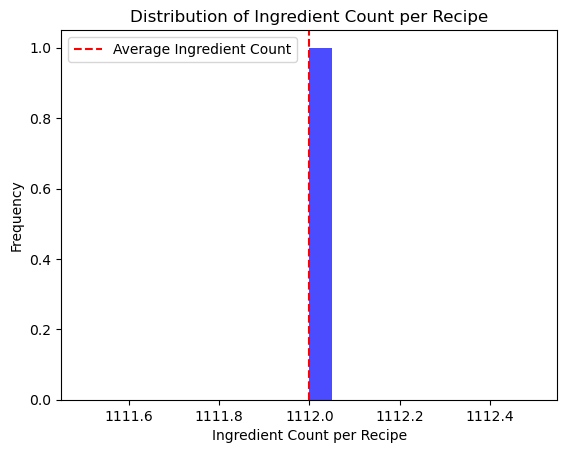

Average Ingredient Count per Recipe: 1112.0


In [64]:
import pandas as pd
import matplotlib.pyplot as plt


query = """
MATCH (r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
RETURN r.name AS Recipe, COUNT(i) AS IngredientCount
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)


average_ingredient_count = df['IngredientCount'].mean()


plt.hist(df['IngredientCount'], bins=20, alpha=0.7, color='blue')
plt.axvline(x=average_ingredient_count, color='r', linestyle='--', label='Average Ingredient Count')
plt.xlabel('Ingredient Count per Recipe')
plt.ylabel('Frequency')
plt.title('Distribution of Ingredient Count per Recipe')
plt.legend()
plt.show()

print(f'Average Ingredient Count per Recipe: {average_ingredient_count}')


C:\Users\apple\AppData\Local\Temp\ipykernel_8352\982234637.py:25: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



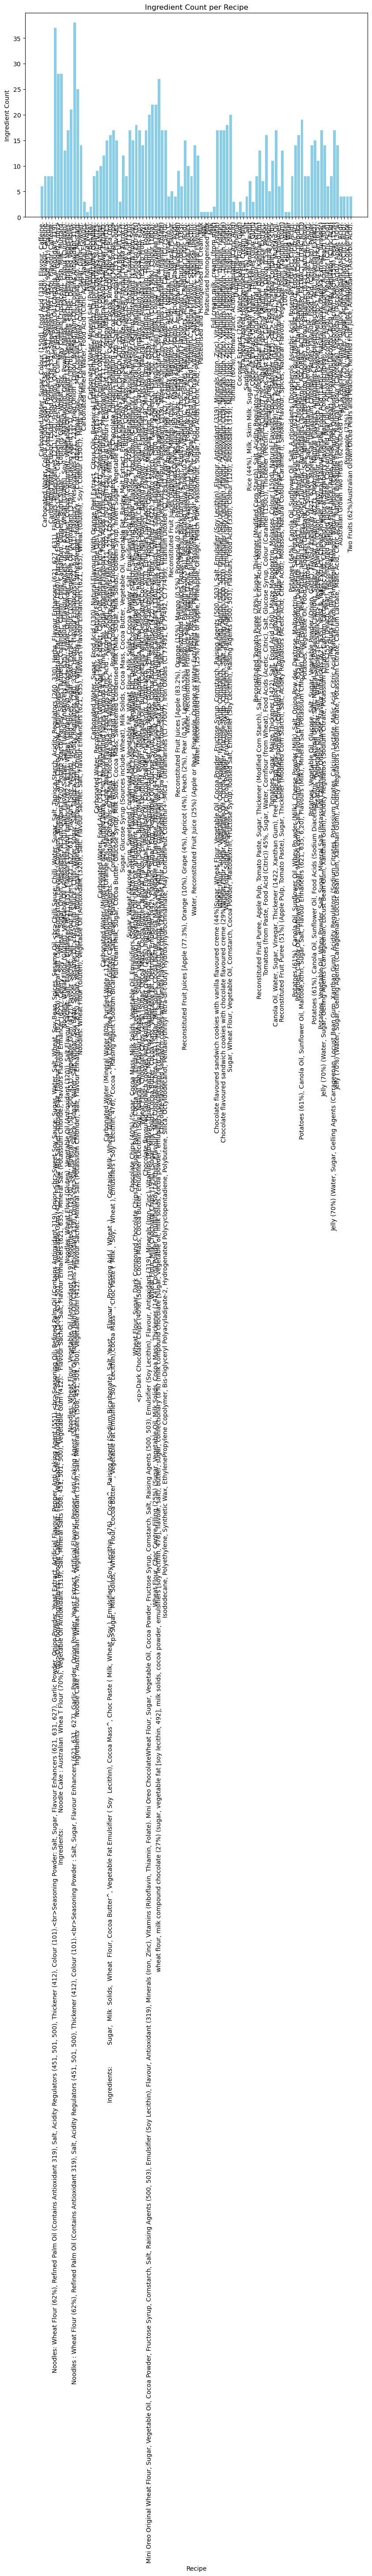

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


query = """
MATCH (r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
RETURN r.ingredients_orig AS Recipe, COUNT(i) AS IngredientCount
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)


plt.figure(figsize=(10, 6))
plt.bar(df['Recipe'], df['IngredientCount'], color='skyblue')
plt.xlabel('Recipe')
plt.ylabel('Ingredient Count')
plt.title('Ingredient Count per Recipe')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
import plotly.express as px
import pandas as pd


query = """
MATCH (r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
RETURN r.ingredients_orig AS Recipe, COUNT(i) AS IngredientCount
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]

# convert to Pandas DataFrame
df = pd.DataFrame(neo4j_data)


fig = px.bar(df, x='Recipe', y='IngredientCount', title='Ingredient Count per Recipe', labels={'Recipe': 'Recipe Name', 'IngredientCount':'Ingredient Count'})
fig.update_layout(xaxis={'categoryorder':'total ascending'})  # order
fig.show()


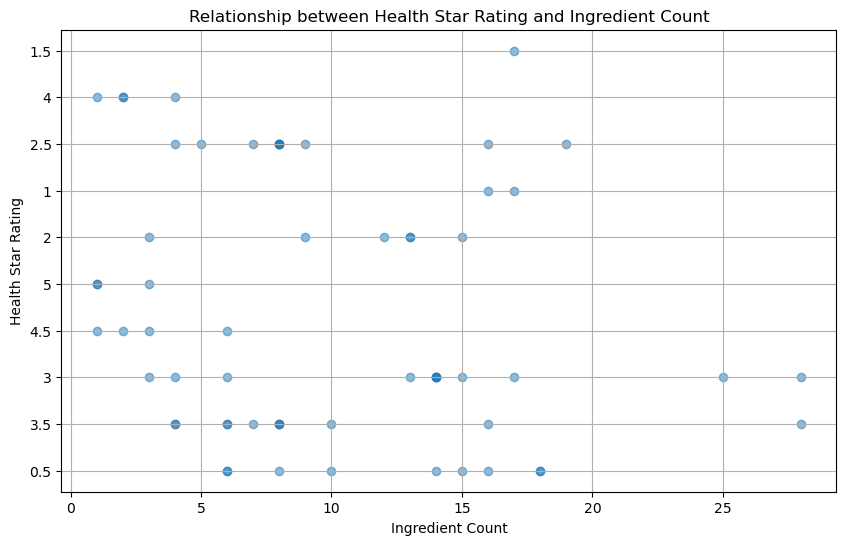

Correlation between Health Star Rating and Ingredient Count: -0.43


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
OPTIONAL MATCH (p)-[:HAS_RATING]->(h:HealthStarRating)
RETURN p.name AS Product, r.ingredients_orig AS Recipe, COUNT(i) AS IngredientCount, h.rating AS HealthStarRating
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)


#  Remove the null value
df = df.dropna(subset=['IngredientCount', 'HealthStarRating'])

#  create the scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['IngredientCount'], df['HealthStarRating'], alpha=0.5)
plt.xlabel('Ingredient Count')
plt.ylabel('Health Star Rating')
plt.title('Relationship between Health Star Rating and Ingredient Count')
plt.grid(True)
plt.show()

# Convert "HealthStarRating" column to floating point format
df['HealthStarRating'] = df['HealthStarRating'].astype(float)

# Caculate the correlation
correlation = df['HealthStarRating'].corr(df['IngredientCount'])
print(f'Correlation between Health Star Rating and Ingredient Count: {correlation:.2f}')
#This means that there is a somewhat negative correlation between "Health Star Rating" and "Ingredient Count",
#i.e. as the number of ingredients in a food increases, the Health Star Rating tends to decrease,
#and vice versa. This may imply that the more ingredients added to a food, the more adverse its impact on health evaluation may be.


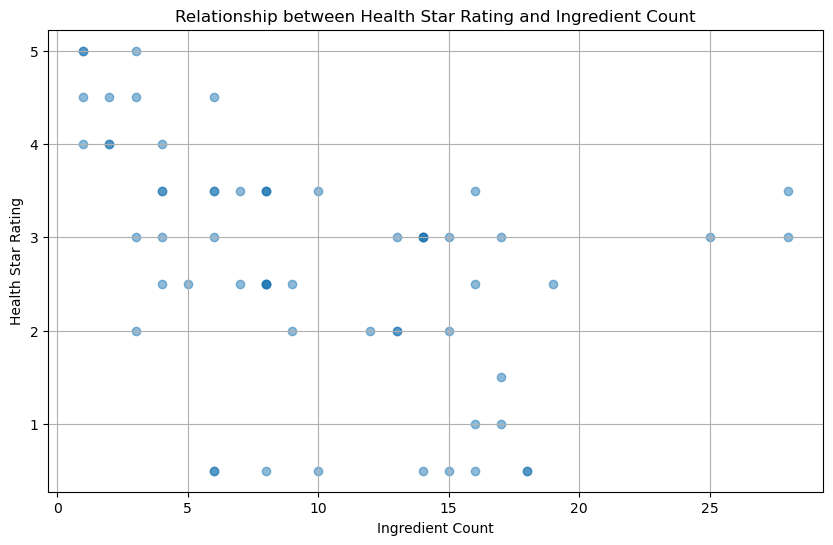

Correlation between Health Star Rating and Ingredient Count: -0.43
This means that there is a somewhat negative correlation between Health Star Rating and Ingredient Count, i.e., as the number of ingredients in a food increases, the Health Star Rating tends to decrease, and vice versa. This may imply that the more ingredients added to a food, the more adverse its impact on health evaluation may be.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# 连接到Neo4j数据库
driver = GraphDatabase.driver("neo4j+s://9d1381c2.databases.neo4j.io:7687", auth=("Shirley", "Sxl19950312"))

query = """
MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
OPTIONAL MATCH (p)-[:HAS_RATING]->(h:HealthStarRating)
RETURN p.name AS Product, r.ingredients_orig AS Recipe, COUNT(i) AS IngredientCount, h.rating AS HealthStarRating
"""

with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]

df = pd.DataFrame(neo4j_data)

# 移除HealthStarRating和IngredientCount为空的行
df = df.dropna(subset=['IngredientCount', 'HealthStarRating'])

# 转换HealthStarRating为浮点型
df['HealthStarRating'] = pd.to_numeric(df['HealthStarRating'], errors='coerce')
df = df.dropna(subset=['HealthStarRating'])

#  创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['IngredientCount'], df['HealthStarRating'], alpha=0.5)
plt.xlabel('Ingredient Count')
plt.ylabel('Health Star Rating')
plt.title('Relationship between Health Star Rating and Ingredient Count')
plt.grid(True)
plt.show()

# 计算相关性
correlation = df['HealthStarRating'].corr(df['IngredientCount'])
print(f'Correlation between Health Star Rating and Ingredient Count: {correlation:.2f}')

# 解释相关性
if correlation < 0:
    print("This means that there is a somewhat negative correlation between Health Star Rating and Ingredient Count, "
          "i.e., as the number of ingredients in a food increases, the Health Star Rating tends to decrease, and vice versa. "
          "This may imply that the more ingredients added to a food, the more adverse its impact on health evaluation may be.")
else:
    print("This means that there is a somewhat positive correlation between Health Star Rating and Ingredient Count, "
          "i.e., as the number of ingredients in a food increases, the Health Star Rating tends to increase, and vice versa. "
          "This may imply that the more ingredients added to a food, the more favorable its impact on health evaluation may be.")


                                               Product  IngredientCount  \
0       Coca - Cola Classic  Soft Drink Multipack Cans               18   
1            Coca - Cola Classic  Soft Drink Mini Cans                6   
2       Coca - Cola Vanilla  Soft Drink Multipack Cans                6   
3     Coca - Cola Zero Sugar Soft Drink Multipack Cans               16   
5    Coca - Cola Caffeine Free Zero Sugar Soft Drin...                8   
..                                                 ...              ...   
98                      Woolworths Two Fruits In Juice               14   
99             Woolworths Two Fruits In Tropical Jelly               17   
100                Woolworths Apple In Pineapple Jelly               14   
101                Goulburn Valley Two Fruits In Juice                4   
104  Goulburn Valley Two Fruits In Juice Fruit Cups...                4   

     HealthStarRating  
0                 0.5  
1                 0.5  
2                 0.5  
3  

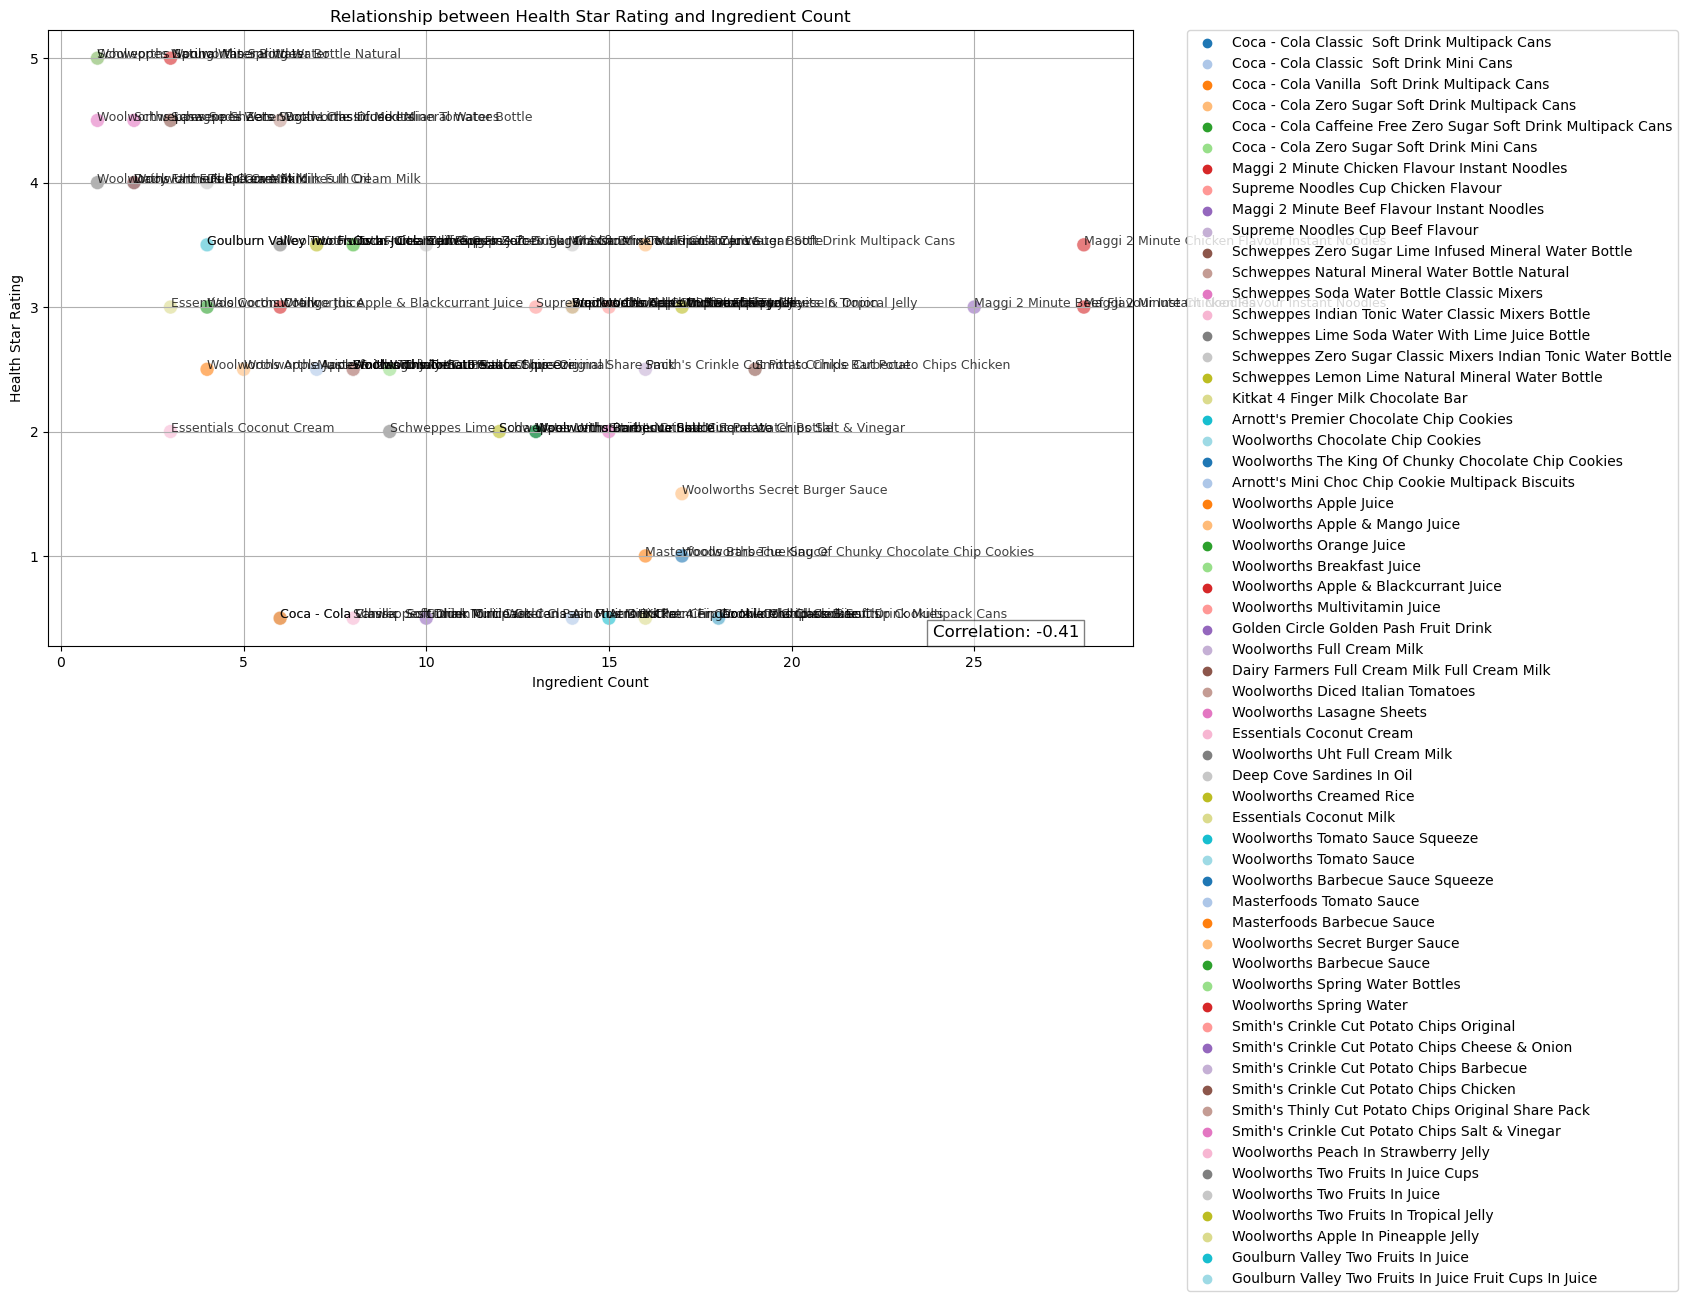

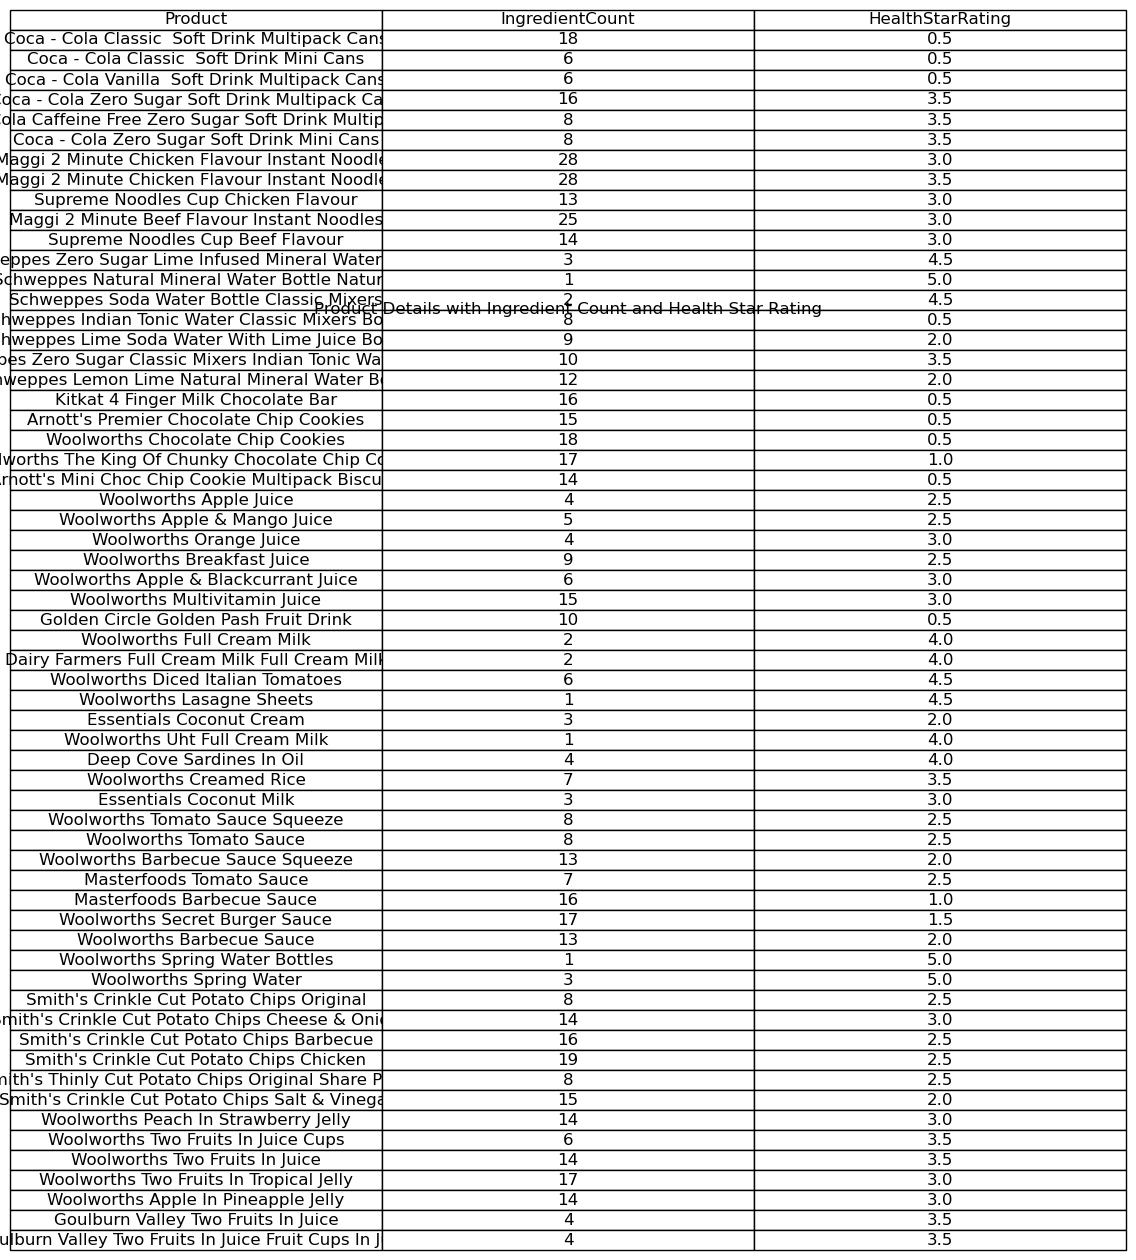

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from neo4j import GraphDatabase

# 连接到Neo4j数据库
driver = GraphDatabase.driver("neo4j+s://9d1381c2.databases.neo4j.io:7687", auth=("Shirley", "Sxl19950312"))

query = """
MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
OPTIONAL MATCH (p)-[:HAS_RATING]->(h:HealthStarRating)
RETURN p.name AS Product, COUNT(i) AS IngredientCount, h.rating AS HealthStarRating
"""

with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]

df = pd.DataFrame(neo4j_data)


df['HealthStarRating'] = pd.to_numeric(df['HealthStarRating'], errors='coerce')


df = df.dropna(subset=['IngredientCount', 'HealthStarRating'])


df['IngredientCount'] = df['IngredientCount'].astype(int)


print(df)


correlation = df['HealthStarRating'].corr(df['IngredientCount'])
print(f'Overall correlation between Health Star Rating and Ingredient Count: {correlation:.2f}')


plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(data=df, x='IngredientCount', y='HealthStarRating', hue='Product', palette='tab20', s=100, alpha=0.6, edgecolor='w', linewidth=0.5)


for i in range(len(df)):
    scatter.text(df['IngredientCount'].iloc[i], df['HealthStarRating'].iloc[i], df['Product'].iloc[i], fontsize=9, alpha=0.75)

plt.xlabel('Ingredient Count')
plt.ylabel('Health Star Rating')
plt.title('Relationship between Health Star Rating and Ingredient Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)


plt.text(0.95, 0.01, f'Correlation: {correlation:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Product Details with Ingredient Count and Health Star Rating')
plt.show()


In [91]:
import pandas as pd
import plotly.express as px
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:HAS_RATING]->(h:HealthStarRating)
RETURN p.name AS Product, h.rating AS HealthStarRating
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

#  Remove the null value
#df = df.dropna(subset=['HealthStarRating'])

# use Plotly to created 
fig = px.bar(df, x='Product', y='HealthStarRating', color='Product', title='Health Star Rating per Product')
fig.update_layout(xaxis_title='Product', yaxis_title='Health Star Rating')
fig.show()


fig1 = px.scatter(df, x='Product', y='HealthStarRating', color='Product', title='Health Star Rating per Product')
fig1.update_layout(xaxis_title='Product', yaxis_title='Health Star Rating')
fig1.show()

In [81]:
import plotly.graph_objects as go
import pandas as pd


scatter = go.Scatter(x=df['IngredientCount'], y=df['HealthStarRating'], mode='markers', 
                     marker=dict(color='blue', size=8, opacity=0.5),
                     name='Health Star Rating vs Ingredient Count')

fig = go.Figure(data=[scatter])

fig.update_layout(title='Relationship between Health Star Rating and Ingredient Count',
                  xaxis_title='Ingredient Count',
                  yaxis_title='Health Star Rating',
                  showlegend=True)

fig.show()
